In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

In [ ]:
import IPython
from IPython import display
from IPython.display import Audio

In [ ]:
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams.update({'font.size': 18})

In [ ]:
dt = 0.001
t = np.arange(0,1,dt)
f0 = 50
f1 = 120

In [ ]:
x = np.sin(2*np.pi*f0*t) + np.sin(2*np.pi*f1*t) #np.cos(2*np.pi*t*(f0 + (f1-f0)*np.power(t,2)/(3*t1**2)))
x_limpo = x.copy()
x = x + 3*np.random.rand(len(t))

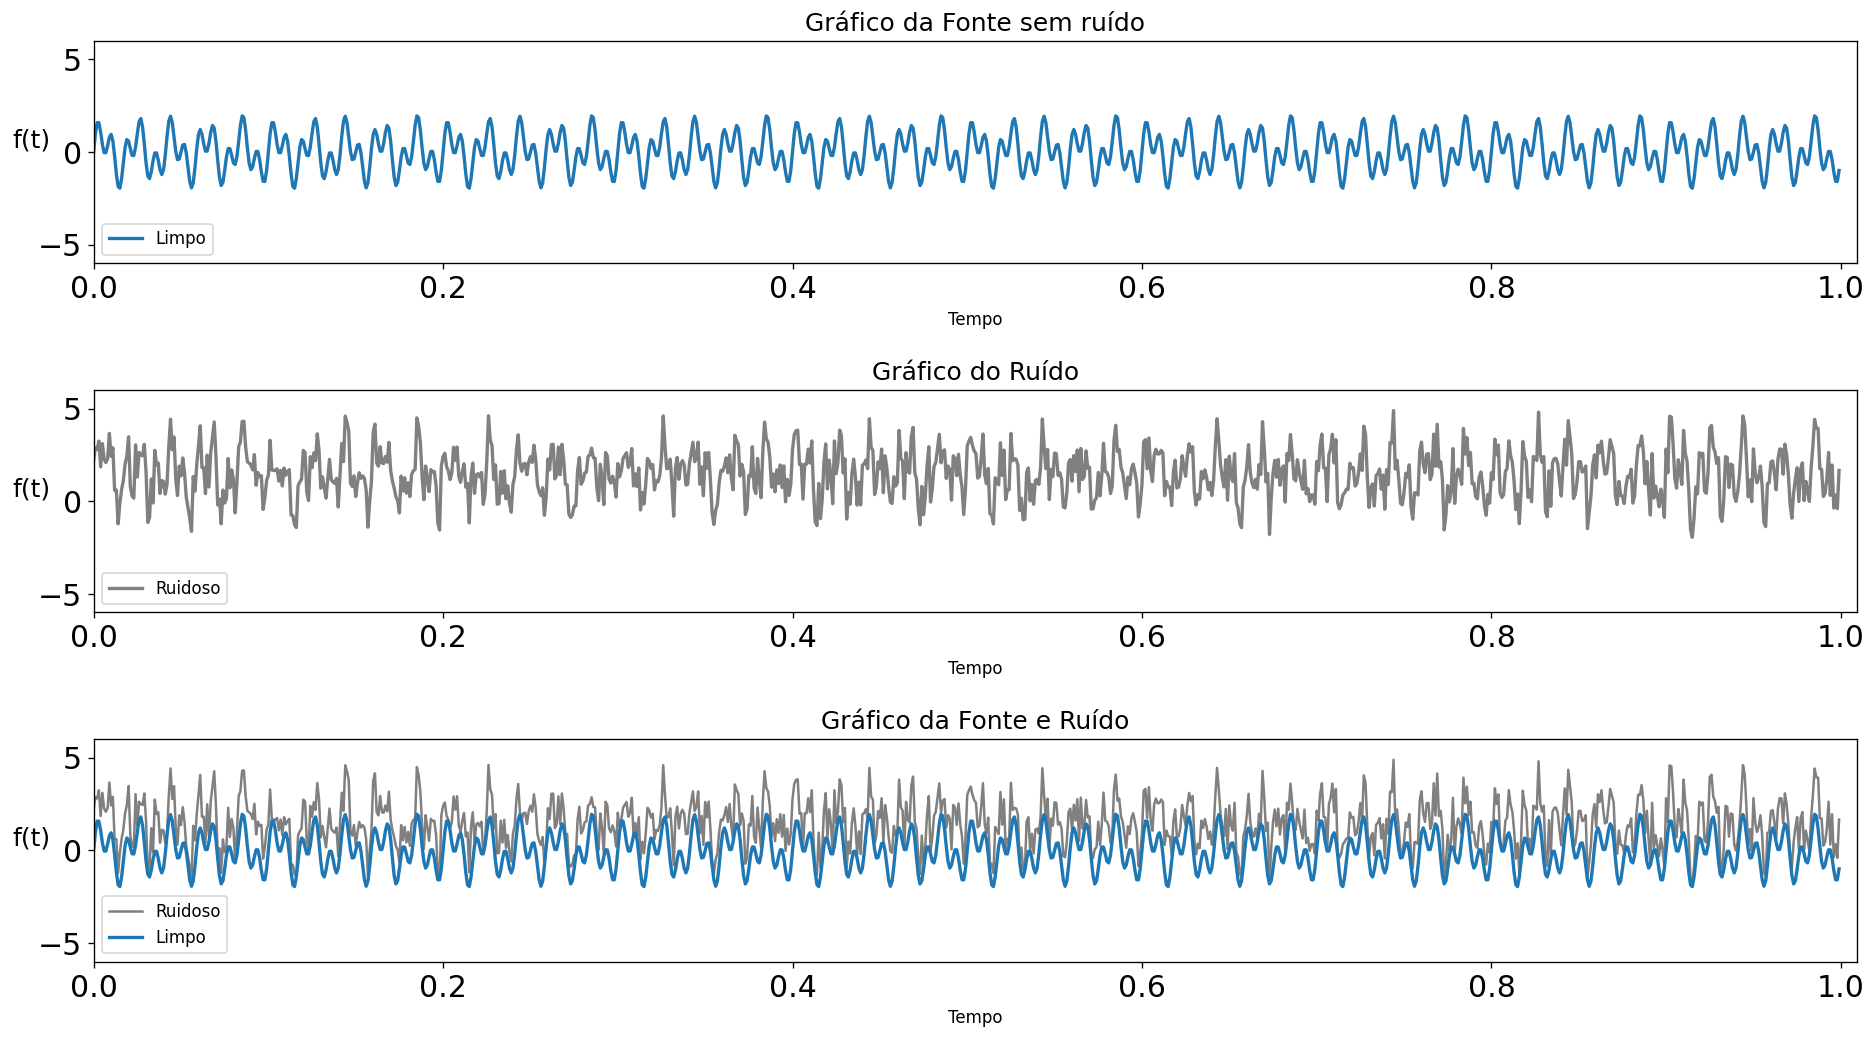

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(16,9), dpi=120)

#gráfico 1
plt.sca(axs[0])
plt.title('Gráfico da Fonte sem ruído', fontsize=15)
plt.xlabel('Tempo', fontsize=10)
plt.ylabel('f(t)', fontsize=15, rotation=0)
plt.ylim(-6,6)
plt.xlim(t[0], t[-1]+0.01)
plt.plot(t, x_limpo, lw=2, label='Limpo')
plt.legend(fontsize=10, loc='lower left')

#gráfico 2
plt.sca(axs[1])
plt.title('Gráfico do Ruído', fontsize=15)
plt.xlabel('Tempo', fontsize=10)
plt.ylabel('f(t)', fontsize=15, rotation=0)
plt.ylim(-6,6)
plt.xlim(t[0], t[-1]+0.01)
plt.plot(t,x, c='grey', lw=2, label='Ruidoso')
plt.legend(fontsize=10, loc='lower left')


#gráfico 3
plt.sca(axs[2])
plt.title('Gráfico da Fonte e Ruído', fontsize=15)
plt.xlabel('Tempo', fontsize=10)
plt.ylabel('f(t)', fontsize=15, rotation=0)
plt.ylim(-6,6)
plt.xlim(t[0], t[-1]+0.01)
plt.plot(t,x, c='grey', lw=1.5, label='Ruidoso')
plt.plot(t, x_limpo, lw=2, label='Limpo')
plt.legend(fontsize=10, loc='lower left')


fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


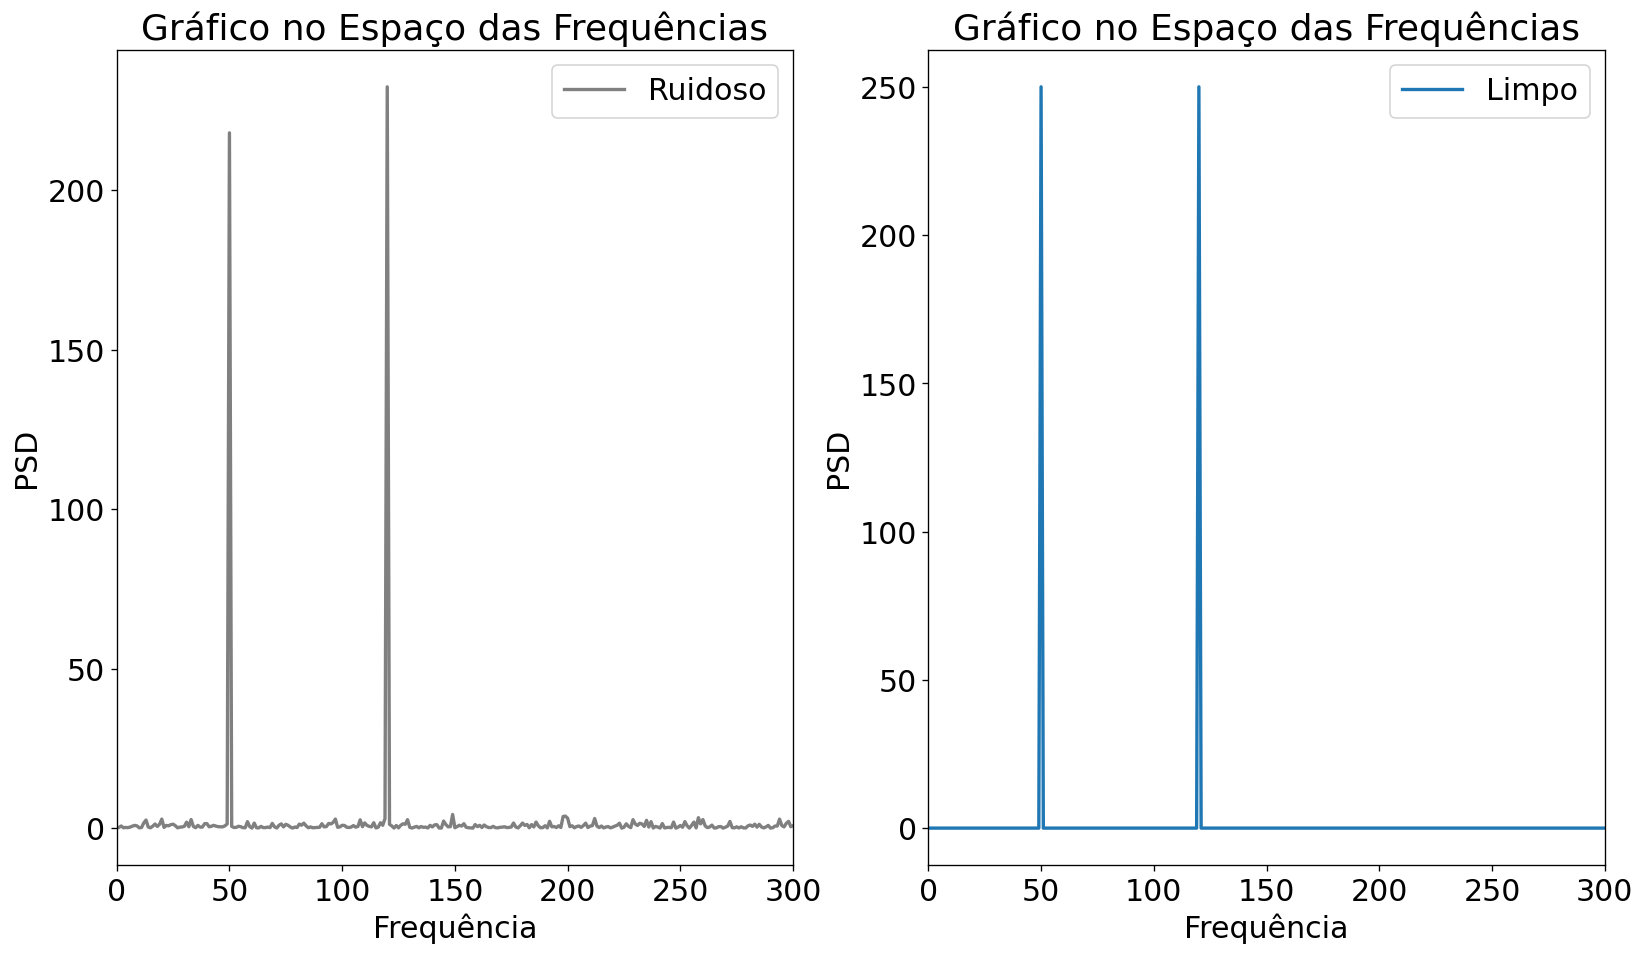

In [ ]:
n = len(t)
fHAT = np.fft.fft(x, n)                       # Calculando a FFT
psd  = fHAT * np.conj(fHAT)/n                 # Espectro de Frequencias (Magnitude de cada frequencia)
freqs = (1/(dt*n))*np.arange(n)               # Valores para eixo X (lista com as frequencias)
L = np.arange(1, np.floor(n/2), dtype='int')  # Plotando apenas a metade (função periódica)


fHAT_limpo = np.fft.fft(x_limpo, n)
psd_limpo  = fHAT_limpo * np.conj(fHAT_limpo)/n 





fig, axs = plt.subplots(1,2, figsize=(16,9), dpi=120)


plt.sca(axs[0])
plt.title('Gráfico no Espaço das Frequências')
plt.xlabel('Frequência')
plt.ylabel('PSD')
plt.xlim(0,300)
plt.plot(freqs[L], psd[L], lw=2, label='Ruidoso', c='grey')
plt.legend()

plt.sca(axs[1])
plt.title('Gráfico no Espaço das Frequências')
plt.xlabel('Frequência')
plt.ylabel('PSD')
plt.xlim(0,300)
plt.plot(freqs[L], psd_limpo[L], lw=2, label='Limpo')
plt.legend()

plt.show()


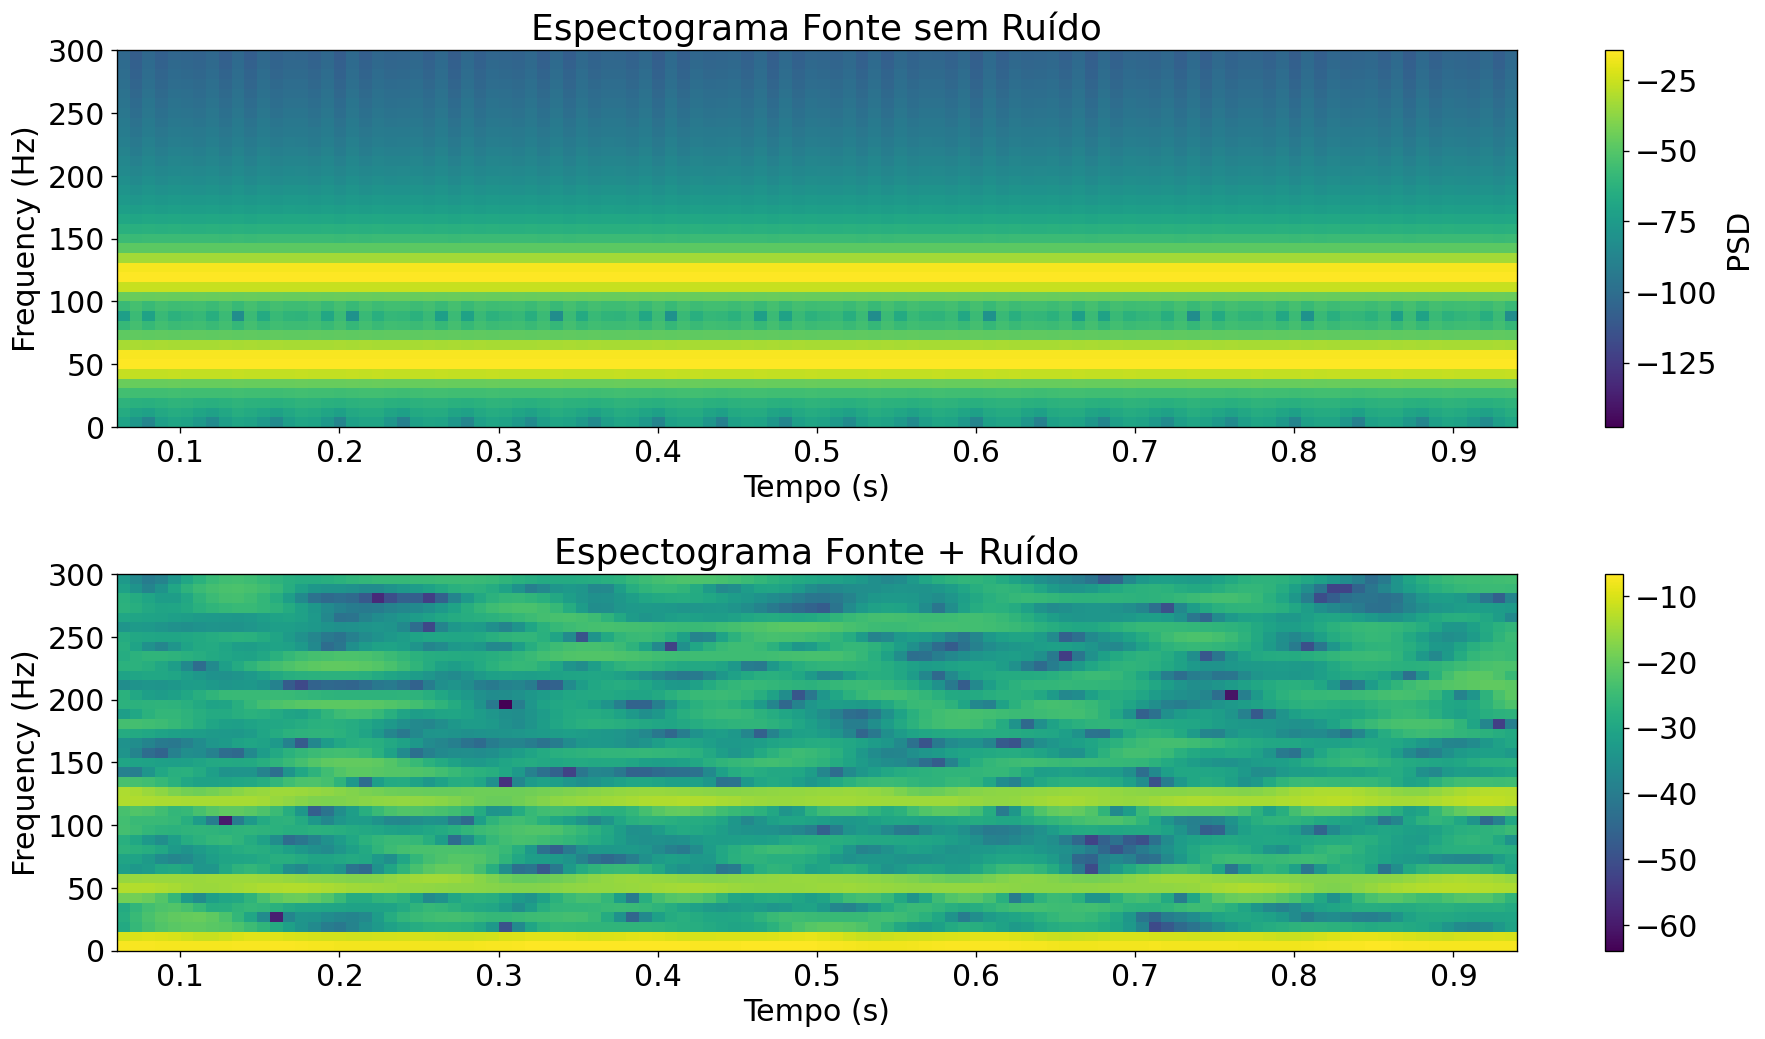

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(16,9), dpi=120)

plt.sca(axs[0])
plt.specgram(x_limpo, NFFT=128, Fs=1/dt, noverlap=120, cmap='viridis')
plt.ylim(0,300)
plt.title('Espectograma Fonte sem Ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='PSD')



plt.sca(axs[1])
plt.specgram(x, NFFT=128, Fs=1/dt, noverlap=120, cmap='viridis')
plt.ylim(0,300)
plt.title('Espectograma Fonte + Ruído')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()




fig.tight_layout()
plt.show()

In [ ]:
PSD = psd.copy()
indices = PSD > 200  # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fHAT     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


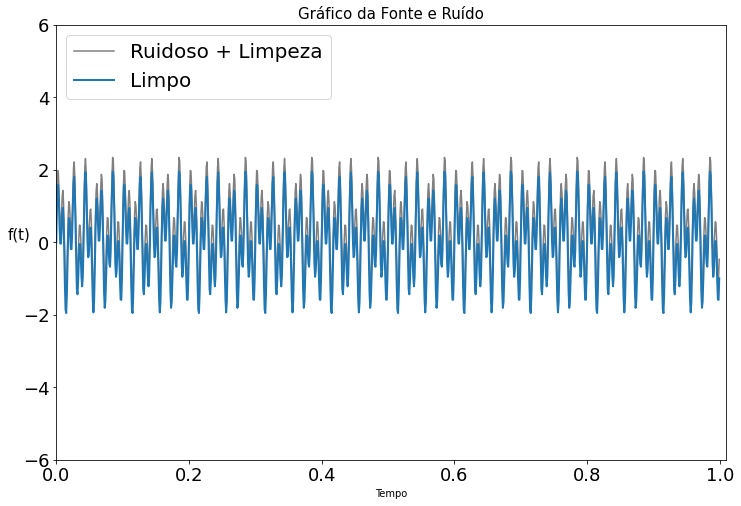

In [ ]:
plt.title('Gráfico da Fonte e Ruído', fontsize=15)
plt.xlabel('Tempo', fontsize=10)
plt.ylabel('f(t)', fontsize=15, rotation=0)
plt.ylim(-6,6)
plt.xlim(t[0], t[-1]+0.01)
ffiltplot = ffilt - 1
plt.plot(t,ffiltplot, c='grey', lw=1.5, label='Ruidoso + Limpeza')
plt.plot(t, x_limpo, lw=2, label='Limpo')
plt.legend(fontsize=20, loc='upper left')

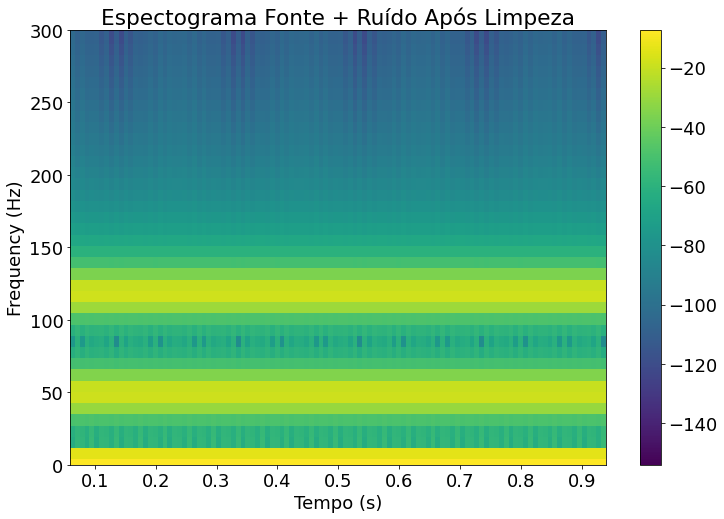

In [ ]:
plt.specgram(ffilt, NFFT=128, Fs=1/dt, noverlap=120, cmap='viridis')
plt.ylim(0,300)
plt.title('Espectograma Fonte + Ruído Após Limpeza')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
fig.tight_layout()

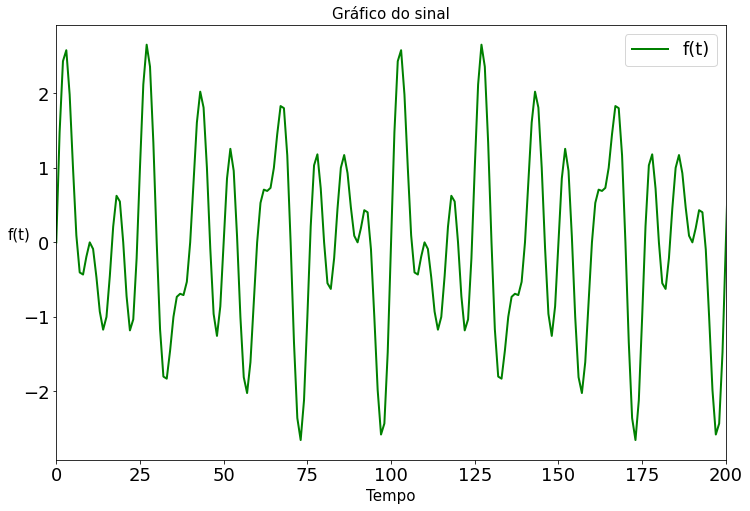

In [ ]:
g1 = np.sin(2*np.pi*f0*t) + np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*80*t)
plt.plot(g1, lw=2, c='green', label='f(t)')
plt.xlim(0,200)
plt.title('Gráfico do sinal', fontsize=15)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('f(t)', fontsize=15, rotation=0)
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


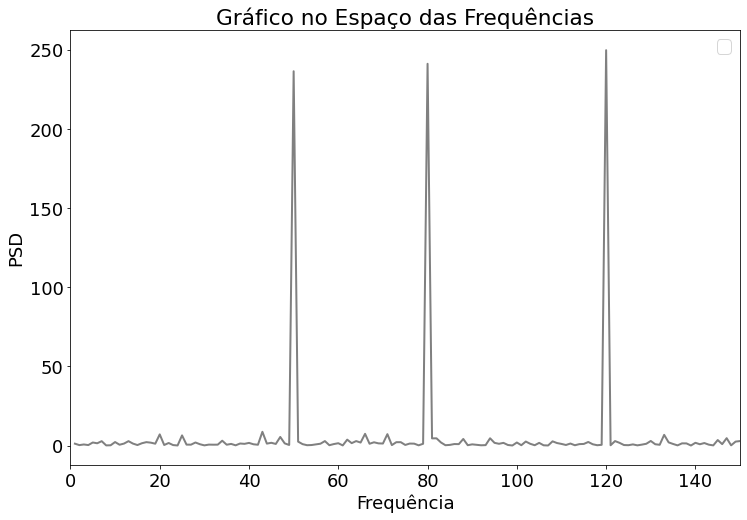

In [ ]:
n = len(t)
g1 = g1 + 3*np.random.rand(len(t))
fHATg1 = np.fft.fft(g1, n)                       # Calculando a FFT
psdg1  = fHATg1 * np.conj(fHATg1)/n                 # Espectro de Frequencias (Magnitude de cada frequencia)
freqsg1 = (1/(dt*n))*np.arange(n)               # Valores para eixo X (lista com as frequencias)
Lg1 = np.arange(1, np.floor(n/2), dtype='int')  # Plotando apenas a metade (função periódica)
plt.title('Gráfico no Espaço das Frequências')
plt.xlabel('Frequência')
plt.ylabel('PSD')
plt.xlim(0,150)
plt.plot(freqsg1[Lg1], psdg1[Lg1], lw=2, label='', c='grey')
plt.legend()

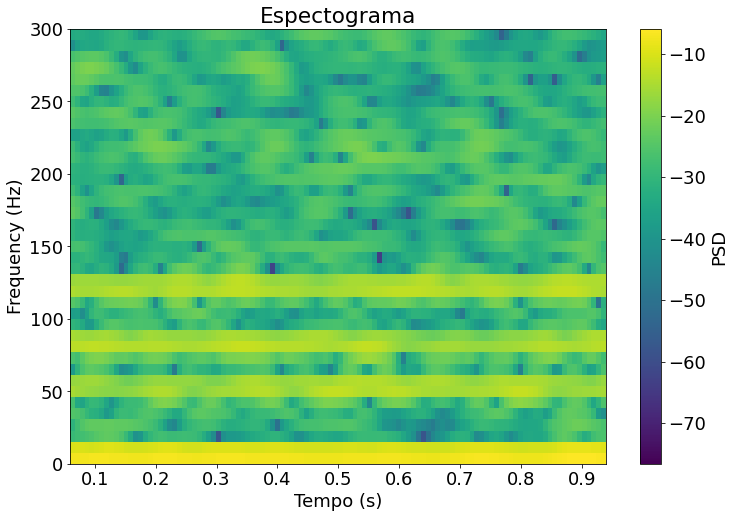

In [ ]:
g1 = g1 + 3*np.random.rand(len(t))
plt.specgram(g1, NFFT=128, Fs=1/dt, noverlap=120, cmap='viridis')
plt.ylim(0,300)
plt.title('Espectograma')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='PSD')
plt.show()

In [ ]:
time = np.arange(0,5, dt)
chirp = np.cos(2*np.pi*time*(f0 + (f1-f0)*np.power(time,2)/(3*2**2)))

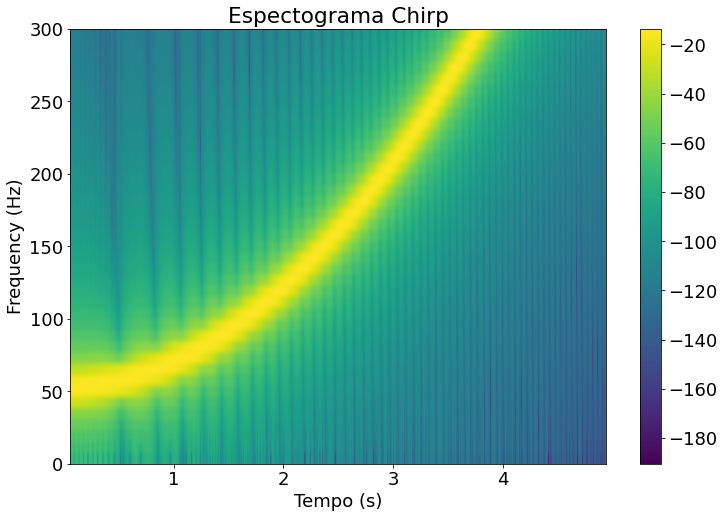

In [ ]:
plt.specgram(chirp, NFFT=128, Fs=1/dt, noverlap=120, cmap='viridis')
plt.ylim(0,300)
plt.title('Espectograma Chirp')
plt.xlabel('Tempo (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
fig.tight_layout()

In [ ]:
rate = 6000
Audio(data=chirp, rate=rate)